Kolmogorov-Smirnov Tests:
Apakah distribusi usia responden mengikuti distribusi normal atau tidak?

=== Tabel Ringkasan Hasil Uji Kolmogorov–Smirnov ===


,Statistik,Nilai
0,Jumlah Data,1000
1,Rata-rata,27.4400
2,Standar Deviasi,12.2861
3,Statistik K-S,0.2650
4,P-value,0.0000



=== Tabel Perhitungan Lengkap ===


,Parameter,Nilai
0,Jumlah data (n),1000
1,Rata-rata (mean),27.4400
2,Standar deviasi (std),12.2861
3,Statistik K-S,0.2650
4,P-value,0.0000
5,Alpha,0.05
6,Kesimpulan,Tolak H0 (α=0.05): Distribusi usia TIDAK normal.


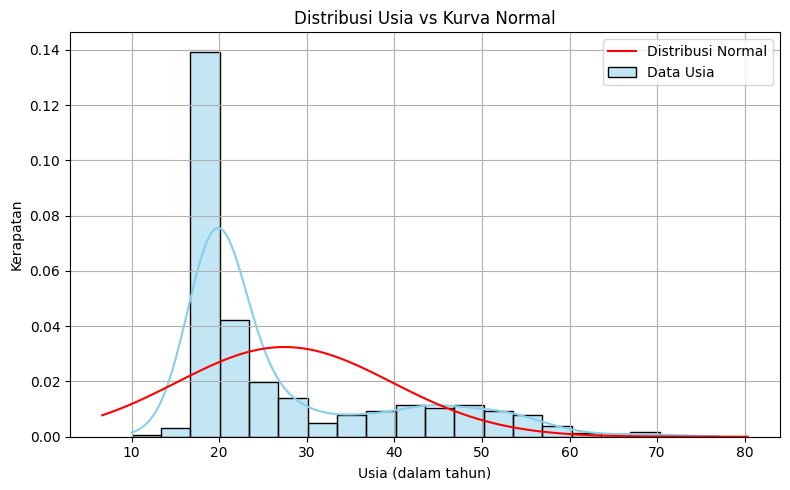

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load dataset
df = pd.read_excel("Dataset_Tubes.xlsx")

# Ambil kolom usia dan buang missing value
usia = df['Usia__dalam_tahun'].dropna()

# Hitung rata-rata dan standar deviasi dari data
mean = usia.mean()
std = usia.std()
n = len(usia)

# Lakukan Kolmogorov–Smirnov test terhadap distribusi normal dengan parameter dari data
statistic, p_value = kstest(usia, 'norm', args=(mean, std))

# Buat tabel ringkasan hasil
summary_df = pd.DataFrame({
    "Statistik": ["Jumlah Data", "Rata-rata", "Standar Deviasi", "Statistik K-S", "P-value"],
    "Nilai": [n, f"{mean:.4f}", f"{std:.4f}", f"{statistic:.4f}", f"{p_value:.4f}"]
})

print("=== Tabel Ringkasan Hasil Uji Kolmogorov–Smirnov ===")
display(summary_df)

# Penjelasan hasil
alpha = 0.05
if p_value < alpha:
    kesimpulan = f"Tolak H0 (α={alpha}): Distribusi usia TIDAK normal."
else:
    kesimpulan = f"Gagal tolak H0 (α={alpha}): Distribusi usia dapat dianggap normal."

# Buat tabel perhitungan lengkap
detail_df = pd.DataFrame({
    "Parameter": [
        "Jumlah data (n)", "Rata-rata (mean)", "Standar deviasi (std)",
        "Statistik K-S", "P-value", "Alpha", "Kesimpulan"
    ],
    "Nilai": [
        n, f"{mean:.4f}", f"{std:.4f}", f"{statistic:.4f}",
        f"{p_value:.4f}", alpha, kesimpulan
    ]
})

print("\n=== Tabel Perhitungan Lengkap ===")
display(detail_df)

# Visualisasi distribusi
plt.figure(figsize=(8,5))
sns.histplot(usia, kde=True, stat='density', color='skyblue', bins=20, label='Data Usia')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', label='Distribusi Normal')
plt.title("Distribusi Usia vs Kurva Normal")
plt.xlabel("Usia (dalam tahun)")
plt.ylabel("Kerapatan")
plt.legend()
plt.grid(True)
plt.tight_layout()